# **Library**

In [1]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import json
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Import Data

In [4]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/satria_data/src.xlsx'

Mounted at /content/drive


In [5]:
df = pd.read_excel(file_path)
df

,text,label
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik
...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan


# Cleaning

In [6]:
df.isna().sum()

text     0
label    0
dtype: int64

In [7]:
def clean_tweet(tweet):
    tweet = re.sub(r'@\S+', '', tweet).strip()
    tweet = re.sub(r'(https\S+)', '', tweet).strip()
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet).strip()
    tweet = re.sub(r'\[RE.*?\]', '', tweet).strip()
    tweet = re.sub(r'^RT\b\s*', '', tweet).strip()
    tweet = re.sub(r'[^\w\s]', '', tweet).strip()
    return tweet

In [8]:
df['cleaned'] = df['text'].apply(clean_tweet)

# Tokenizing

In [9]:
df['lowered'] = df['cleaned'].apply(lambda x: x.lower().strip().replace('\n', ' ').replace('\r', ' '))
df['tokenized'] = df['lowered'].apply(lambda x: word_tokenize(x))
df

,text,label,cleaned,lowered,tokenized
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,Kunjungan Prabowo ini untuk meresmikan dan men...,kunjungan prabowo ini untuk meresmikan dan men...,"[kunjungan, prabowo, ini, untuk, meresmikan, d..."
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,Anies dapat tepuk tangan meriah saat jadi Rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,"[anies, dapat, tepuk, tangan, meriah, saat, ja..."
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,emng bener sih pendukung 01 ada yg goblok begi...,emng bener sih pendukung 01 ada yg goblok begi...,"[emng, bener, sih, pendukung, 01, ada, yg, gob..."
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,"[sewaktu, anies, bersikap, kritis, ke, kinerja..."
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,Anies Baswedan Harap ASN termasuk TNI dan Polr...,anies baswedan harap asn termasuk tni dan polr...,"[anies, baswedan, harap, asn, termasuk, tni, d..."
...,...,...,...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik,Ngeliat debat kemaren pas prabowo kicep kekira...,ngeliat debat kemaren pas prabowo kicep kekira...,"[ngeliat, debat, kemaren, pas, prabowo, kicep,..."
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik,Masyarakat yakin bahwa PrabowoGibran memiliki ...,masyarakat yakin bahwa prabowogibran memiliki ...,"[masyarakat, yakin, bahwa, prabowogibran, memi..."
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi,imo both are irrational but yg satu jauh lebih...,imo both are irrational but yg satu jauh lebih...,"[imo, both, are, irrational, but, yg, satu, ja..."
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan,look at that pak ganjar anda sdh berkecimpung ...,look at that pak ganjar anda sdh berkecimpung ...,"[look, at, that, pak, ganjar, anda, sdh, berke..."


# Remove Stopwords

In [10]:
factory = StopWordRemoverFactory()
sastrawi_stopwords = factory.get_stop_words()
nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = {'gak', 'yg', 'bgt', 'dr', 'tdk', 'aja', 'dgn', 'yg', 'dpt', 'dlu',
    'emg', 'kok', 'skrg', 'lg', 'smp', 'td', 'tdr', 'tp', 'udh',
    'y', 'cm', 'btw', 'lgsg', 'nih', 'd', 'kt', 'bkn', 'bbrp', 'jg',
    'tpi', 'n', 'ga', 'sm', 'utk', 'ama', 'gmna', 'pdhl', 'bgtu',
    'jd', 'tau', 'dah', 'dri', 'skali', 'gt', 'kpn', 'sdh', 'smua',
    'brp', 'pd', 'nanti', 'trus', 'bgt', 'trnyata', 'klo', 'dg', 'hny',
    'lgsg', 'krg', 'pnya', 'bs', 'jln', 'dgn', 'dik', 'krn', 'mgkn',
    'tdi', 'spt', 'gmn', 'sih', 'dlm', 'kalo', 'jadi', 'utk', 'aj', 'krn',
    'nya', 'kalau', 'spy', 'loh', 'yah', 'sy', 'ksh', 'tuh'}
combined_stopwords = set(nltk_stopwords).union(custom_stopwords,sastrawi_stopwords)


df['w/o stopwords'] = df['tokenized'].apply(lambda tokens: [token for token in tokens if token not in combined_stopwords])
df

,text,label,cleaned,lowered,tokenized,w/o stopwords
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,Kunjungan Prabowo ini untuk meresmikan dan men...,kunjungan prabowo ini untuk meresmikan dan men...,"[kunjungan, prabowo, ini, untuk, meresmikan, d...","[kunjungan, prabowo, meresmikan, menyerahkan, ..."
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,Anies dapat tepuk tangan meriah saat jadi Rekt...,anies dapat tepuk tangan meriah saat jadi rekt...,"[anies, dapat, tepuk, tangan, meriah, saat, ja...","[anies, tepuk, tangan, meriah, rektor, mewajib..."
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,emng bener sih pendukung 01 ada yg goblok begi...,emng bener sih pendukung 01 ada yg goblok begi...,"[emng, bener, sih, pendukung, 01, ada, yg, gob...","[emng, bener, pendukung, 01, goblok, pendukung..."
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,Sewaktu anies bersikap kritis ke kinerja pak p...,sewaktu anies bersikap kritis ke kinerja pak p...,"[sewaktu, anies, bersikap, kritis, ke, kinerja...","[sewaktu, anies, bersikap, kritis, kinerja, pa..."
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,Anies Baswedan Harap ASN termasuk TNI dan Polr...,anies baswedan harap asn termasuk tni dan polr...,"[anies, baswedan, harap, asn, termasuk, tni, d...","[anies, baswedan, harap, asn, termasuk, tni, p..."
...,...,...,...,...,...,...
4995,RT @l1DsGGe2xObT3t72dHwqlT58X7jvEYtEnauZIZSYwS...,Politik,Ngeliat debat kemaren pas prabowo kicep kekira...,ngeliat debat kemaren pas prabowo kicep kekira...,"[ngeliat, debat, kemaren, pas, prabowo, kicep,...","[ngeliat, debat, kemaren, pas, prabowo, kicep,..."
4996,Masyarakat yakin bahwa Prabowo-Gibran memiliki...,Politik,Masyarakat yakin bahwa PrabowoGibran memiliki ...,masyarakat yakin bahwa prabowogibran memiliki ...,"[masyarakat, yakin, bahwa, prabowogibran, memi...","[masyarakat, yakin, prabowogibran, memiliki, v..."
4997,imo both are irrational but yg satu jauh lebih...,Ekonomi,imo both are irrational but yg satu jauh lebih...,imo both are irrational but yg satu jauh lebih...,"[imo, both, are, irrational, but, yg, satu, ja...","[imo, irrational, satu, jauh, lebih, irrationa..."
4998,@cIIGSdjaPrmAQY1E4gWnLpIZSdyQn8ZMhjJzgOsxfRM= ...,Pertahanan dan Keamanan,look at that pak ganjar anda sdh berkecimpung ...,look at that pak ganjar anda sdh berkecimpung ...,"[look, at, that, pak, ganjar, anda, sdh, berke...","[look, pak, ganjar, berkecimpung, lgislatif, e..."


# Stemming

In [11]:
df1 = df[['label','w/o stopwords']]
factory = StemmerFactory()
stemmer = factory.create_stemmer()
df1['stemmed_tokens'] = df1['w/o stopwords'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])
df1

<ipython-input-11-b33776aa9443>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['stemmed_tokens'] = df1['w/o stopwords'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])


,label,w/o stopwords,stemmed_tokens
0,Sumber Daya Alam,"[kunjungan, prabowo, meresmikan, menyerahkan, ...","[kunjung, prabowo, resmi, serah, proyek, bantu..."
1,Politik,"[anies, tepuk, tangan, meriah, rektor, mewajib...","[anies, tepuk, tangan, riah, rektor, wajib, ma..."
2,Demografi,"[emng, bener, pendukung, 01, goblok, pendukung...","[emng, bener, dukung, 01, goblok, dukung, 02, ..."
3,Politik,"[sewaktu, anies, bersikap, kritis, kinerja, pa...","[waktu, anies, sikap, kritis, kerja, pak, prab..."
4,Politik,"[anies, baswedan, harap, asn, termasuk, tni, p...","[anies, baswedan, harap, asn, masuk, tni, polr..."
...,...,...,...
4995,Politik,"[ngeliat, debat, kemaren, pas, prabowo, kicep,...","[ngeliat, debat, kemaren, pas, prabowo, kicep,..."
4996,Politik,"[masyarakat, yakin, prabowogibran, memiliki, v...","[masyarakat, yakin, prabowogibran, milik, visi..."
4997,Ekonomi,"[imo, irrational, satu, jauh, lebih, irrationa...","[imo, irrational, satu, jauh, lebih, irrationa..."
4998,Pertahanan dan Keamanan,"[look, pak, ganjar, berkecimpung, lgislatif, e...","[look, pak, ganjar, kecimpung, lgislatif, ekse..."


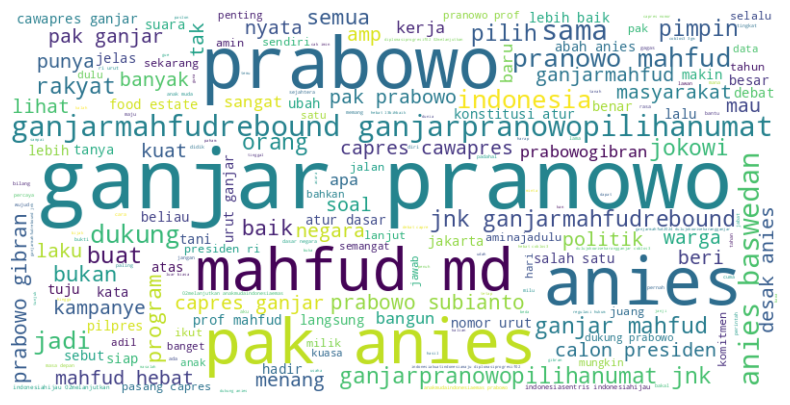

In [12]:
text_for_wordcloud = ' '.join([' '.join(tokens) for tokens in df1['stemmed_tokens']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


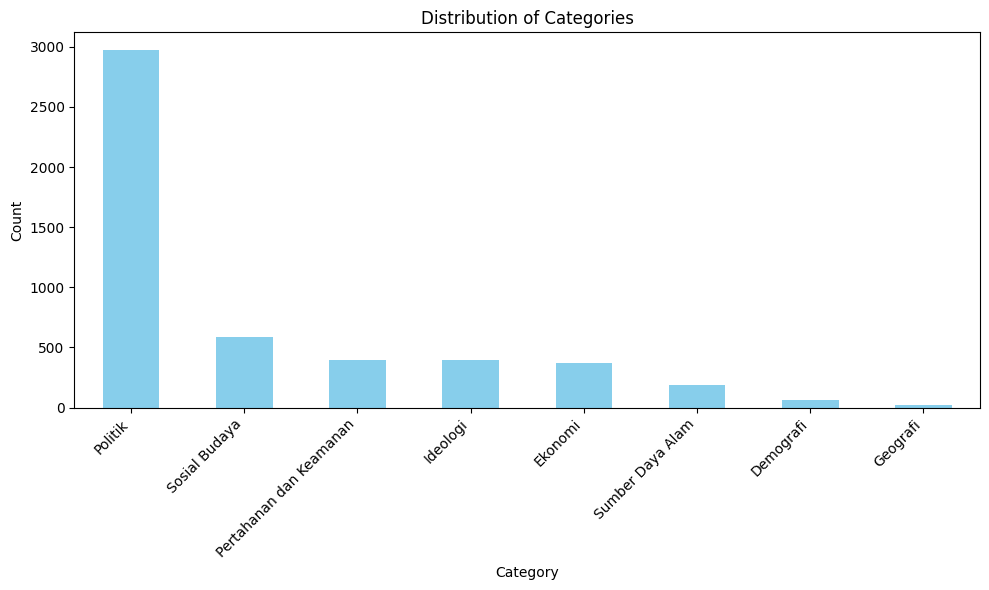

In [13]:
plt.figure(figsize=(10, 6))
df1['label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Label Encoding

In [14]:
label_categories = df1['label'].unique()
label_mapping = {label: i for i, label in enumerate(label_categories)}
mapping_file_path = '/content/drive/My Drive/satria_data/label_mapping.json'

# Write the dictionary to a JSON file
with open(mapping_file_path, 'w') as f:
    json.dump(label_mapping, f)
label_mapping

{'Sumber Daya Alam': 0,
 'Politik': 1,
 'Demografi': 2,
 'Pertahanan dan Keamanan': 3,
 'Ideologi': 4,
 'Ekonomi': 5,
 'Sosial Budaya': 6,
 'Geografi': 7}

In [ ]:
df1['label_num'] = df['label'].map(label_mapping)
df1

<ipython-input-40-1020642cd415>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['label_num'] = df['label'].map(label_mapping)


,label,w/o stopwords,stemmed_tokens,label_num
0,Sumber Daya Alam,"[kunjungan, prabowo, meresmikan, menyerahkan, ...","[kunjung, prabowo, resmi, serah, proyek, bantu...",1
1,Politik,"[anies, tepuk, tangan, meriah, rektor, mewajib...","[anies, tepuk, tangan, riah, rektor, wajib, ma...",2
2,Demografi,"[emng, bener, pendukung, 01, goblok, pendukung...","[emng, bener, dukung, 01, goblok, dukung, 02, ...",3
3,Politik,"[sewaktu, anies, bersikap, kritis, kinerja, pa...","[waktu, anies, sikap, kritis, kerja, pak, prab...",2
4,Politik,"[anies, baswedan, harap, asn, termasuk, tni, p...","[anies, baswedan, harap, asn, masuk, tni, polr...",2
...,...,...,...,...
4995,Politik,"[ngeliat, debat, kemaren, pas, prabowo, kicep,...","[ngeliat, debat, kemaren, pas, prabowo, kicep,...",2
4996,Politik,"[masyarakat, yakin, prabowogibran, memiliki, v...","[masyarakat, yakin, prabowogibran, milik, visi...",2
4997,Ekonomi,"[imo, irrational, satu, jauh, lebih, irrationa...","[imo, irrational, satu, jauh, lebih, irrationa...",6
4998,Pertahanan dan Keamanan,"[look, pak, ganjar, berkecimpung, lgislatif, e...","[look, pak, ganjar, kecimpung, lgislatif, ekse...",4


In [ ]:
df1['text'] = df1['stemmed_tokens'].apply(lambda x : ' '.join(x))
df1

<ipython-input-41-706bf2bf69ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['text'] = df1['stemmed_tokens'].apply(lambda x : ' '.join(x))


,label,w/o stopwords,stemmed_tokens,label_num,text
0,Sumber Daya Alam,"[kunjungan, prabowo, meresmikan, menyerahkan, ...","[kunjung, prabowo, resmi, serah, proyek, bantu...",1,kunjung prabowo resmi serah proyek bantu air b...
1,Politik,"[anies, tepuk, tangan, meriah, rektor, mewajib...","[anies, tepuk, tangan, riah, rektor, wajib, ma...",2,anies tepuk tangan riah rektor wajib mata kuli...
2,Demografi,"[emng, bener, pendukung, 01, goblok, pendukung...","[emng, bener, dukung, 01, goblok, dukung, 02, ...",3,emng bener dukung 01 goblok dukung 02 hnya sj ...
3,Politik,"[sewaktu, anies, bersikap, kritis, kinerja, pa...","[waktu, anies, sikap, kritis, kerja, pak, prab...",2,waktu anies sikap kritis kerja pak prabowo ang...
4,Politik,"[anies, baswedan, harap, asn, termasuk, tni, p...","[anies, baswedan, harap, asn, masuk, tni, polr...",2,anies baswedan harap asn masuk tni polri pegan...
...,...,...,...,...,...
4995,Politik,"[ngeliat, debat, kemaren, pas, prabowo, kicep,...","[ngeliat, debat, kemaren, pas, prabowo, kicep,...",2,ngeliat debat kemaren pas prabowo kicep kira k...
4996,Politik,"[masyarakat, yakin, prabowogibran, memiliki, v...","[masyarakat, yakin, prabowogibran, milik, visi...",2,masyarakat yakin prabowogibran milik visi jala...
4997,Ekonomi,"[imo, irrational, satu, jauh, lebih, irrationa...","[imo, irrational, satu, jauh, lebih, irrationa...",6,imo irrational satu jauh lebih irrational tbh ...
4998,Pertahanan dan Keamanan,"[look, pak, ganjar, berkecimpung, lgislatif, e...","[look, pak, ganjar, kecimpung, lgislatif, ekse...",4,look pak ganjar kecimpung lgislatif eksekutif ...


In [ ]:
df_final = df1[['text','label','label_num']]
df_final.to_csv("stemmed.csv")